In [ ]:
import numpy as np
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        cov = np.cov(X.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

data = datasets.load_iris()
X = data.data
y = data.target

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [ ]:
pca = PCA(1)
pca.fit(X)
X_projected = pca.transform(X)

print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)

Shape of X: (150, 4)
Shape of transformed X: (150, 1)


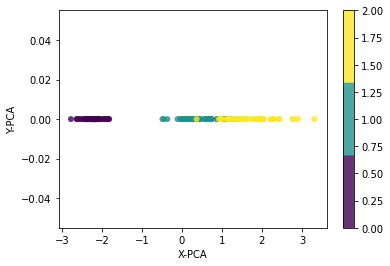

In [ ]:
x1 = X_projected
x2 = np.zeros(shape = x1.shape[0])
plt.scatter(x1, x2,c=y, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('viridis', 3))

plt.xlabel('X-PCA')
plt.ylabel('Y-PCA')
plt.colorbar()
plt.show()

In [ ]:
import numpy as np
import scipy
import math
class KNearestNeighbor:
    ''' Implements the KNearest Neigbours For Classification... '''
    def __init__(self, k, scalefeatures=False):        
        self.k=k
        pass        
    
    def Euclidian_Distance(self,Observe,Actual):
        distance=0
        for x in range(len(Observe)):
            distance += pow((Observe[x] - Actual[x]), 2)
        return math.sqrt(distance)
    def compute_distances_one_loop(self, X):
        dists=[]
        for i in self.X_train:
            dists.append(self.Euclidian_Distance(X,i))
        return dists
    def compute_distances_no_loop(self, X):
        return scipy.spatial.distance.cdist(X,self.X_train,'euclidean')   
    
    def train(self, X, Y):
        self.X_train = X
        self.Y_train = Y

    def predict(self, X, methodtype='oneloop'):
        
      pclass=[]

        #defining a function variable so that you will only need to call compute_distance...        
      compute_distance = self.compute_distances_no_loop(X)
      for i in range(0,compute_distance.shape[0]):
        index = np.argsort(compute_distance[i])
        #print index
        bestvalues = index[:self.k]
        #print np.flip(bestvalues)
        l1 = []
        for k in range(0, len(bestvalues)):
            l1.append(self.Y_train[bestvalues[k]])
        
        labels,counts = np.unique(l1,return_counts = True)
        pclass.append(labels[np.argmax(counts)]) 
      return pclass

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X_projected,y,test_size = 0.3,random_state=0)
Classifier = KNearestNeighbor(3)
Classifier.train(Xtrain,Ytrain)
y_pred = Classifier.predict(Xtest)
print(np.sum(Ytest==y_pred)/len(Ytest))


0.9333333333333333
